# Check the DMRG algorithm in the Critical point of the 2nn Case

We test the performance of DMRG in the critical point ($h_{max}=2e$) for different bond dimension and sweeps at a large size ($l=128,256$)

##### Imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt

#### Data

In [2]:
bonddim=np.array([100,200,300,400])
sweeps=np.arange(1,20)
l=128
eng=np.zeros((bonddim.shape[0],sweeps.shape[0]))
v=np.zeros((bonddim.shape[0],sweeps.shape[0],l))
z=np.zeros((bonddim.shape[0],sweeps.shape[0],l))
for i,b in enumerate(bonddim):
    for j,s in enumerate(sweeps):
        
        data=np.load(f'data/check_dmrg/test_unet_periodic_2nn_{l}_l_5.43656365691809_h_1_n_{s}_sweep_{b}_bonddim.npz')
        eng[i,j]=data['energy']
        v[i,j]=data['potential']
        z[i,j]=data['density']      



Results

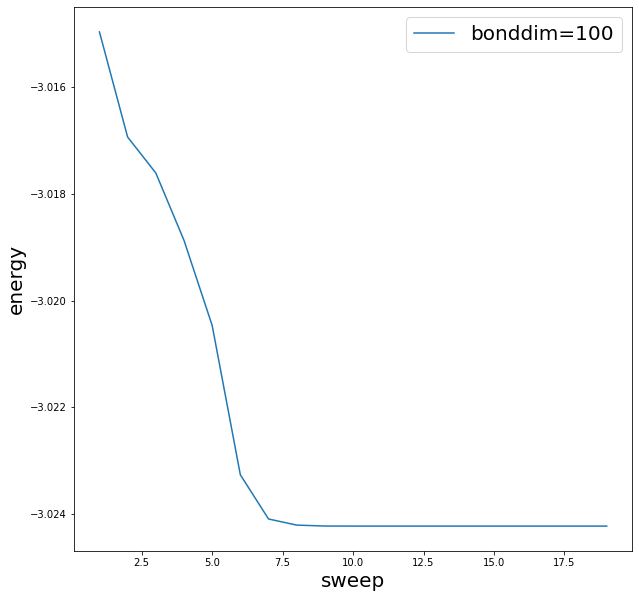

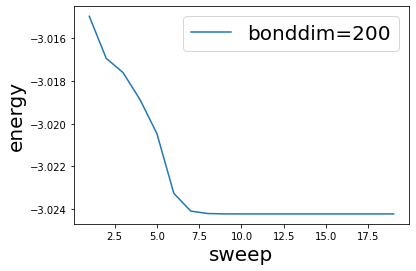

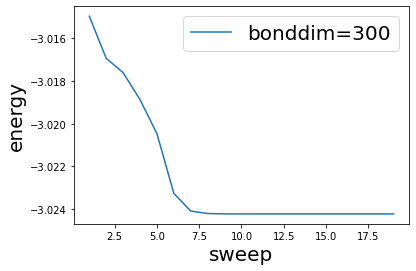

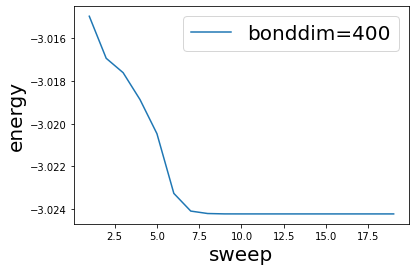

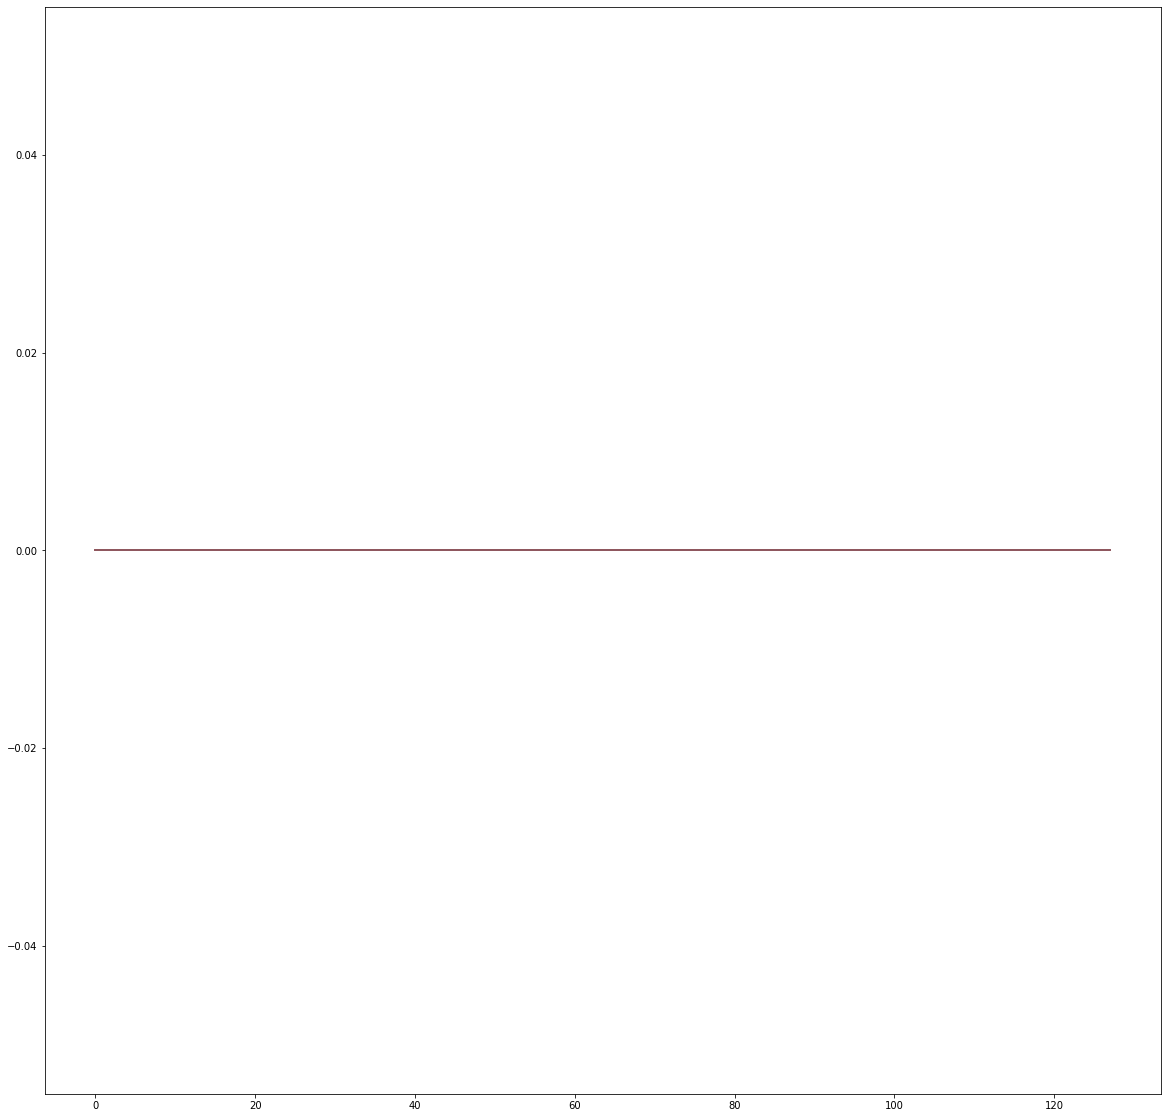

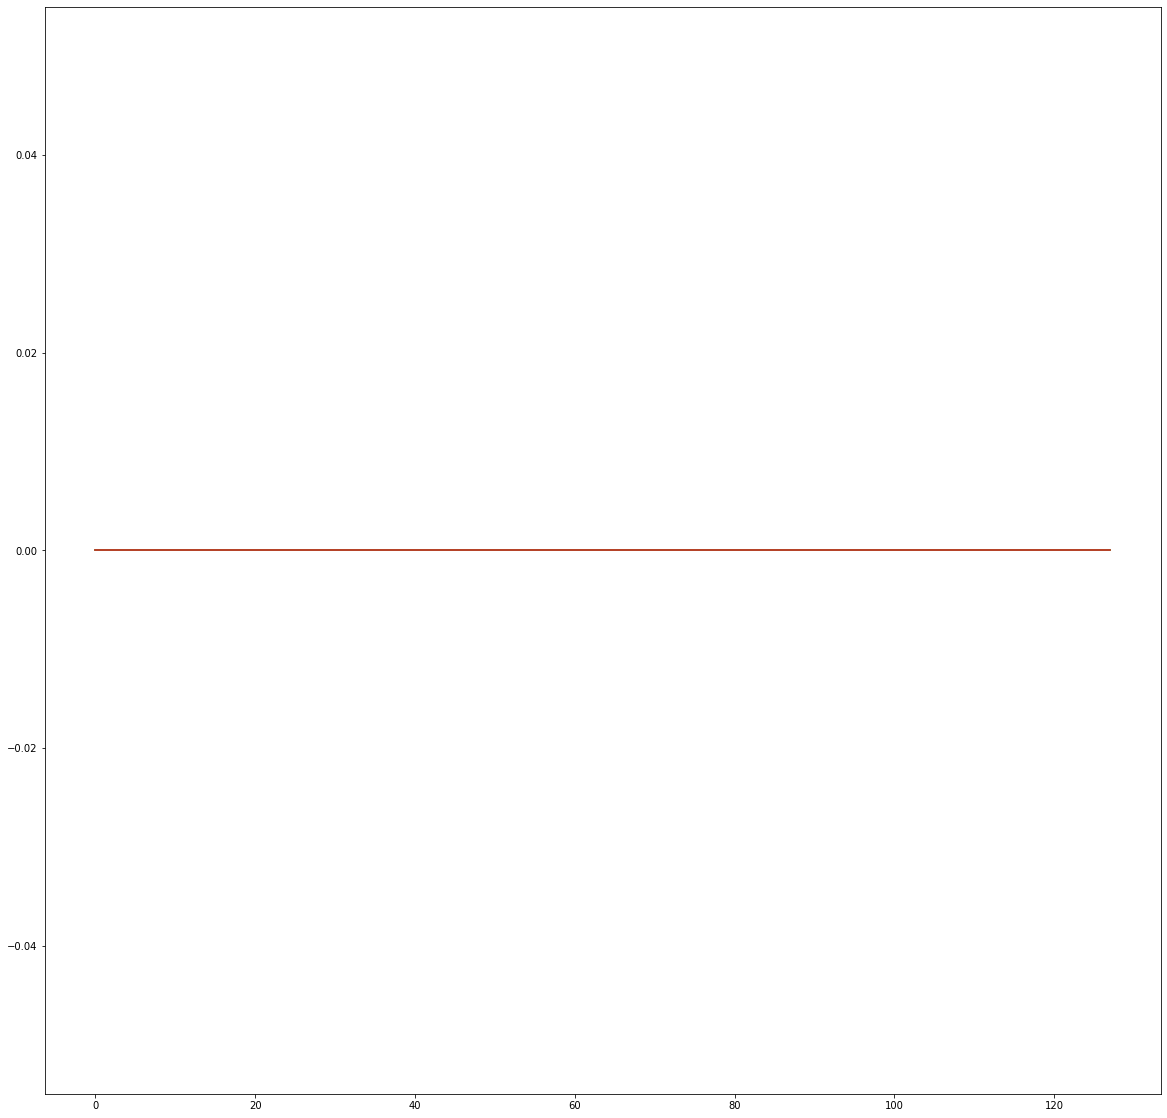

In [3]:
plt.figure(figsize=(10,10))
for i in range(0,bonddim.shape[0]):
    plt.plot(sweeps,eng[i,:],label=f'bonddim={bonddim[i]}')
    plt.legend(fontsize=20)
    plt.xlabel('sweep',fontsize=20)
    plt.ylabel('energy',fontsize=20)
    plt.show()

plt.figure(figsize=(20,20))
for i in range(bonddim.shape[0]):
    for j in range(sweeps.shape[0]):
        plt.plot(v[i,j]-v[-1,-1])
plt.show()


plt.figure(figsize=(20,20))
for i in range(bonddim.shape[0]):
    if np.average(np.abs(z[i,-1]-z[-1,-1]))>10**-3:
        print(bonddim[i])
        
    plt.plot(z[i,-1]-z[-1,-1])
plt.show()